# LA Restaurants Analysis - Summary

## Table of Contents
- [1. Project Setup and Data Collection](#1-project-setup-and-data-collection)
  - [1.1 Environment Setup](#11-environment-setup)
  - [1.2 Data Collection](#12-data-collection)
- [2. Data Understanding and Cleaning](#2-data-understanding-and-cleaning)
  - [2.1 Initial Data Exploration](#21-initial-data-exploration)
  - [2.2 Missing Values](#22-missing-values)
  - [2.3 Duplicates](#23-duplicates)
  - [2.4 Data Type Conversion](#24-data-type-conversion)
- [3. Data Analysis](#3-data-analysis)
  - [3.1 Proporções de tipos de estabelecimentos](#31-proporções-de-tipos-de-estabelecimentos)
  - [3.2 Proporções de estabelecimentos de rede vs. não-rede](#32-proporções-de-estabelecimentos-de-rede-vs-não-rede)
  - [3.3 Distribuição dos Tipos de Estabelecimentos por Categoria](#33-distribuição-dos-tipos-de-estabelecimentos-por-categoria)
  - [3.4 Média de assentos por estabelecimento para redes e não-redes](#34-média-de-assentos-por-estabelecimento-para-redes-e-não-redes)
  - [3.5 Média de assentos por tipo de estabelecimento](#35-média-de-assentos-por-tipo-de-estabelecimento)
  - [3.6 10 Ruas com Maior Número de Estabelecimentos](#36-10-ruas-com-maior-número-de-estabelecimentos)
  - [3.7 Número de ruas que têm apenas um restaurante](#37-número-de-ruas-que-têm-apenas-um-restaurante)
  - [3.8 Distribuição de número de assentos para ruas com muitos restaurantes](#38-distribuição-de-número-de-assentos-para-ruas-com-muitos-restaurantes)
- [4. Conclusão Geral e Recomendações](#4-conclusão-geral-e-recomendações)

# PRESENTATION
[PDF FILE](https://drive.google.com/file/d/1tRzDBrXj0RIWU1TDkW2Hwx-HEAuW5fnb/view?usp=sharing)

## 1. Project Setup and Data Collection

### 1.1 Environment Setup

In [4]:
# Essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configure visualization settings
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)
%matplotlib inline

### 1.2 Data Collection

In [5]:
df = pd.read_csv("datasets/rest_data_us_upd.csv")

## 2. Data Understanding and Cleaning

### 2.1 Initial Data Exploration

In [6]:
# Basic information
print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()
print(f"\nDescriptive statistics:")
display(df.describe(include='all').T)

Dataset shape: (9651, 6)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB

Descriptive statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,9651.0,NaN,NaN,NaN,16611.0,2786.148058,11786.0,14198.5,16611.0,19023.5,21436.0
object_name,9651,8672,THE COFFEE BEAN & TEA LEAF,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,9651,8512,3607 TROUSDALE PKWY,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chain,9648,2,False,5972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
object_type,9651,6,Restaurant,7255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,9651.0,NaN,NaN,NaN,43.695161,47.622874,1.0,14.0,27.0,46.0,229.0


In [7]:
# Check first and last rows
display(df.head())
display(df.tail())

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


In [8]:
# Column types
print(df.dtypes)

id              int64
object_name    object
address        object
chain          object
object_type    object
number          int64
dtype: object


In [9]:
# Unique values in categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n{col} unique values ({df[col].nunique()}):")
    print(df[col].value_counts().head())


object_name unique values (8672):
object_name
THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
WABA GRILL                    14
KENTUCKY FRIED CHICKEN        14
Name: count, dtype: int64

address unique values (8512):
address
3607 TROUSDALE PKWY         11
135 N GRAND AVE             10
400 WORLD WAY                9
5151 STATE UNIVERSITY DR     9
600 WORLD WAY                9
Name: count, dtype: int64

chain unique values (2):
chain
False    5972
True     3676
Name: count, dtype: int64

object_type unique values (6):
object_type
Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Name: count, dtype: int64


#### Breve conclusao:
- Há boa diversidade com muitos negócios independentes (5.972 não são redes)
- O conjunto de dados abrange vários tipos de estabelecimentos alimentícios, sendo os restaurantes a categoria dominante
- O alto número de endereços únicos em relação aos nomes de negócios únicos sugere que a maioria dos negócios é exclusiva de sua localização

### 2.2 Missing Values

In [10]:
# Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
display(missing_df)

,Missing Values,Percentage
chain,3,0.031085


In [11]:
# Display rows with missing 'chain' values
display(df[df['chain'].isnull()])

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [12]:
df_cleaned = df.dropna()

In [13]:
# Check how many rows were dropped
print(f"Original rows: {len(df)}")
print(f"Rows after dropping NA: {len(df_cleaned)}")
print(f"Rows dropped: {len(df) - len(df_cleaned)}")

Original rows: 9651
Rows after dropping NA: 9648
Rows dropped: 3


### 2.3 Duplicates

In [14]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


### 2.4 Data Type Conversion

In [15]:
# Convert to boolean (True/False)
df['chain'] = df['chain'].astype('boolean')
# Convert to categorical type for efficient analysis
df['object_type'] = df['object_type'].astype('category')

In [16]:
# Check columns types again
df.dtypes

id                int64
object_name      object
address          object
chain           boolean
object_type    category
number            int64
dtype: object

In [17]:
#running info to see memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   object_name  9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9648 non-null   boolean 
 4   object_type  9651 non-null   category
 5   number       9651 non-null   int64   
dtypes: boolean(1), category(1), int64(2), object(2)
memory usage: 330.2+ KB


## 3. Data Analysis

### 3.1 Proporções de tipos de estabelecimentos

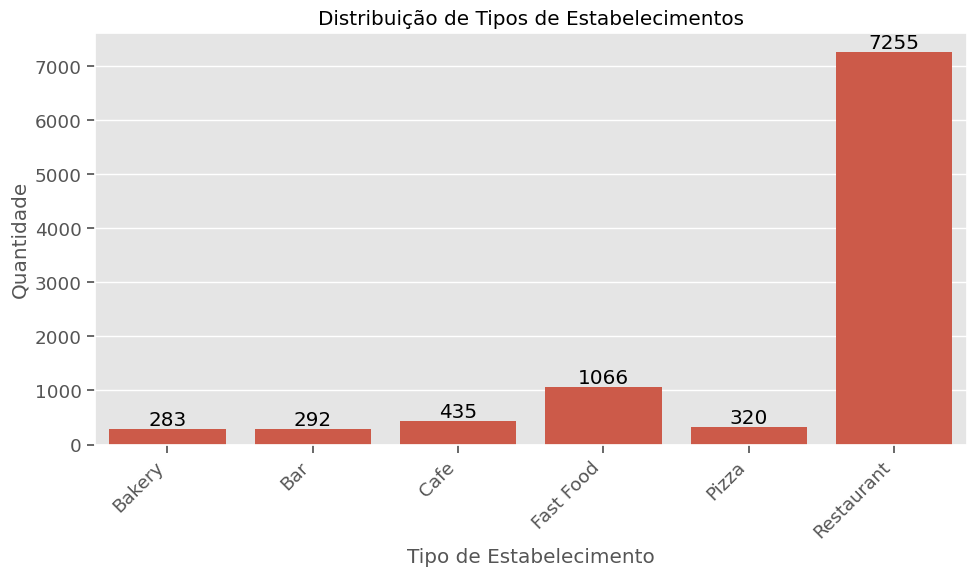

In [18]:
# 3.1 Proporções de tipos de estabelecimentos

# Criar figura
plt.figure(figsize=(10, 6))

# Gráfico de contagem com Seaborn
ax = sns.countplot(x='object_type', data=df)

# Adicionar rótulos e título
plt.title('Distribuição de Tipos de Estabelecimentos')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Quantidade')

# Rotacionar rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Ajustar layout
plt.tight_layout()

# Adicionar valores em cima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')
    
# Mostrar gráfico
plt.show()



#### Interpretação do Gráfico de Distribuição
O gráfico acima mostra a distribuição dos diferentes tipos de estabelecimentos no conjunto de dados. Podemos observar que "Restaurant" (Restaurante) é o tipo predominante, com mais de 7000 estabelecimentos. Em segundo lugar estão os estabelecimentos do tipo "Fast Food", seguidos por "Cafe" (Cafeteria). Os tipos "Bar", "Bakery" (Padaria) e "Pizza" aparecem em menor quantidade. Esta análise nos permite entender a composição do mercado gastronômico na região estudada, evidenciando a predominância de restaurantes tradicionais sobre outros tipos de estabelecimentos alimentícios.


### 3.2 Proporções de estabelecimentos de rede vs. não-rede

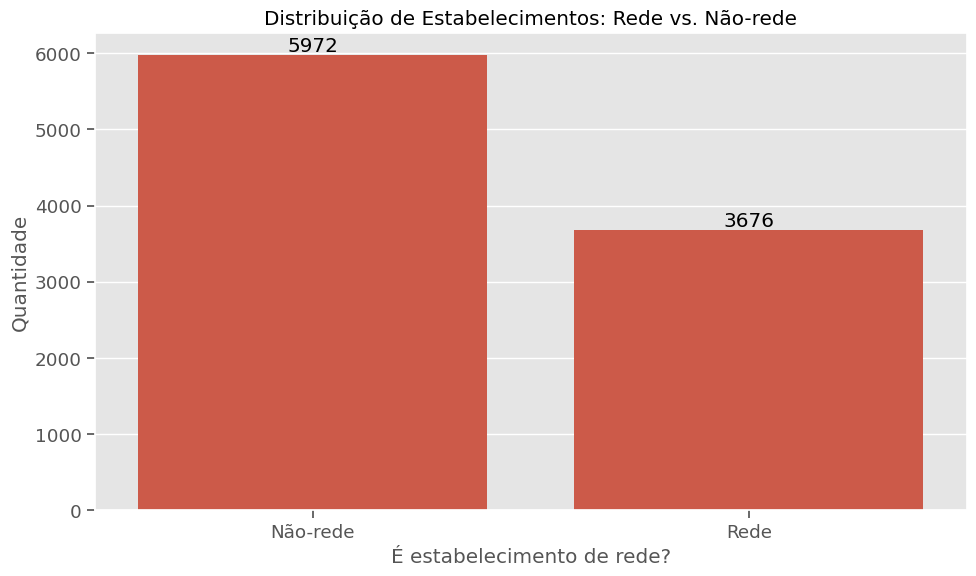

In [19]:

df['chain'] = df['chain'].astype('category')

# Criar figura
plt.figure(figsize=(10, 6))

# Gráfico de contagem com Seaborn
ax = sns.countplot(x='chain', data=df)

# Adicionar rótulos e título
plt.title('Distribuição de Estabelecimentos: Rede vs. Não-rede')
plt.xlabel('É estabelecimento de rede?')
plt.ylabel('Quantidade')

# Renomear os rótulos do eixo x para melhor compreensão
ax.set_xticks([0, 1]) #inclui essa linha para nao haver Warnings
ax.set_xticklabels(['Não-rede', 'Rede'])

# Adicionar valores em cima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()


#### Interpretação do Gráfico de Distribuição de Estabelecimentos por Tipo de Negócio
 O gráfico acima apresenta a distribuição entre estabelecimentos de rede e não-rede. Podemos observar claramente que a maioria dos estabelecimentos são independentes (não-rede), representando aproximadamente 5972 estabelecimentos, enquanto os estabelecimentos de rede somam cerca de 3676.


### 3.3 Distribuição dos Tipos de Estabelecimentos por Categoria (Rede vs. Não-rede)

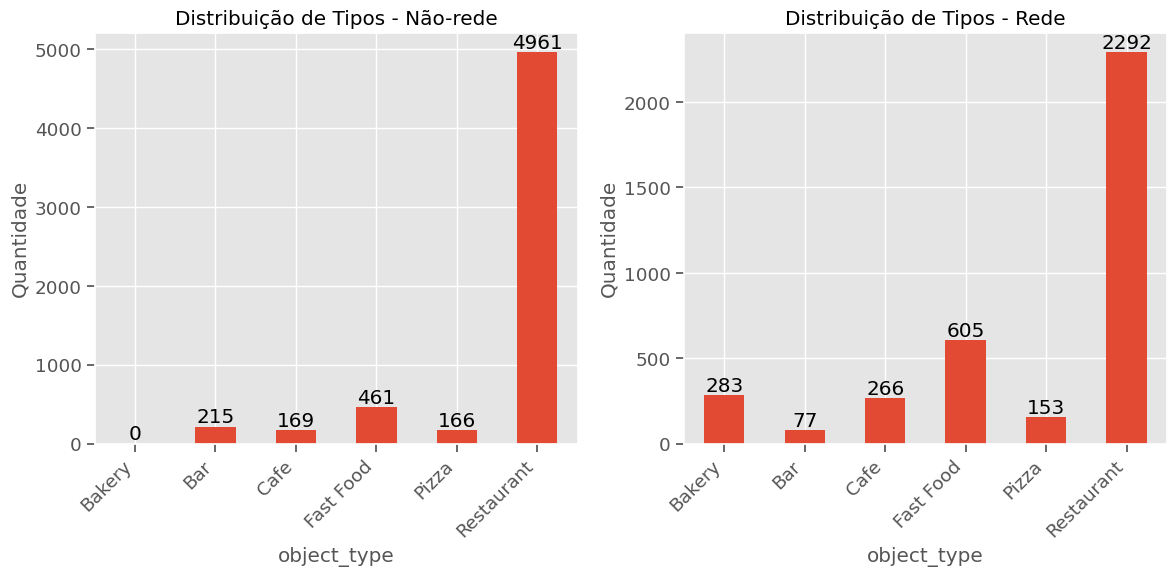

In [20]:
# Criar tabela de contingência entre chain e object_type
chain_type_table = pd.crosstab(df['chain'], df['object_type'])

# Criar figura com subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras para não-rede
chain_type_table.loc[False].plot(kind='bar', ax=ax1)
ax1.set_title('Distribuição de Tipos - Não-rede')
ax1.set_ylabel('Quantidade')

# Rotacionar os nomes das barras
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(chain_type_table.loc[False]):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# Gráfico de barras para rede
chain_type_table.loc[True].plot(kind='bar', ax=ax2)
ax2.set_title('Distribuição de Tipos - Rede')
ax2.set_ylabel('Quantidade')
# Rotacionar os nomes das barras
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adicionar valores nas barras
for i, v in enumerate(chain_type_table.loc[True]):
    ax2.text(i, v, str(v), ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()


#### Interpretação do Gráfico de Distribuição dos Tipos de Estabelecimentos por Categoria
 Para os estabelecimentos não-rede:
 - Restaurantes são predominantes, com mais de 4000 estabelecimentos
 - Cafés, Fast Food e outros tipos aparecem em quantidades menores
 
 Para os estabelecimentos de rede:
 - Restaurantes também são maioria, mas em menor proporção comparado aos independentes
 - Fast Food tem uma presença significativa, demonstrando que este tipo de negócio é mais comum em redes

### 3.4 Média de assentos por estabelecimento para redes e não-redes


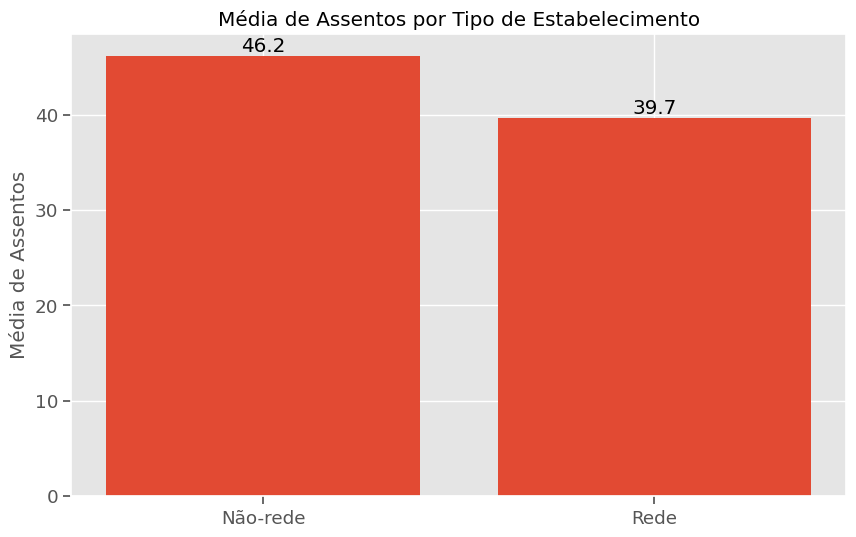


Estatísticas detalhadas:
chain
False    46.171467
True     39.694233
Name: number, dtype: float64


In [21]:
# Calcular média de assentos por estabelecimento para redes e não-redes
seats_by_chain = df.groupby('chain', observed=True)['number'].mean()

# Criar figura
plt.figure(figsize=(10, 6))

# Criar gráfico de barras
plt.bar(range(len(seats_by_chain)), seats_by_chain.values)

# Customizar o gráfico
plt.title('Média de Assentos por Tipo de Estabelecimento')
plt.ylabel('Média de Assentos')
plt.xticks(range(len(seats_by_chain)), ['Não-rede', 'Rede'])

# Adicionar valores sobre as barras
for i, v in enumerate(seats_by_chain.values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.show()

print("\nEstatísticas detalhadas:")
print(seats_by_chain)


#### Interpretação do Gráfico de Relação entre Número de Estabelecimentos e Média de Assentos
 
 Analisando o gráfico acima, podemos observar que:
 
 - Os estabelecimentos de rede são caracterizados por terem um número menor de estabelecimentos (cerca de 3.600) com uma média de assentos ligeiramente menor (aproximadamente 40 assentos)
 - Já os estabelecimentos não-rede possuem um número muito maior de estabelecimentos (aproximadamente 6.000) e uma média um pouco maior de assentos por estabelecimento (cerca de 45 assentos)

 Portanto, as redes são caracterizadas por terem menos estabelecimentos no total, cada um com um número relativamente menor de assentos, quando comparadas aos estabelecimentos independentes.


### 3.5 Média de assentos por tipo de estabelecimento

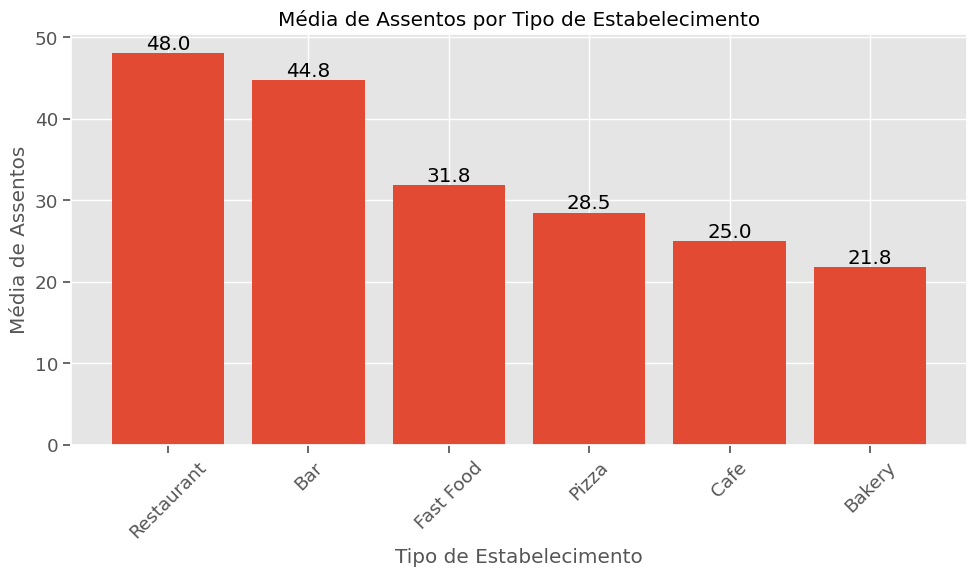


Média de assentos por tipo de estabelecimento:
Restaurant: 48.0 assentos em média
Bar: 44.8 assentos em média
Fast Food: 31.8 assentos em média
Pizza: 28.5 assentos em média
Cafe: 25.0 assentos em média
Bakery: 21.8 assentos em média


In [22]:
# Calcular a média de assentos por tipo de estabelecimento
mean_seats_by_type = df.groupby('object_type', observed=True)['number'].mean()
mean_seats_by_type = mean_seats_by_type.sort_values(ascending=False)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(mean_seats_by_type.index, mean_seats_by_type.values)
plt.title('Média de Assentos por Tipo de Estabelecimento')
plt.xlabel('Tipo de Estabelecimento')
plt.ylabel('Média de Assentos')
plt.xticks(rotation=45)

# Adicionar valores sobre as barras
for i, v in enumerate(mean_seats_by_type.values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Exibir os valores
print("\nMédia de assentos por tipo de estabelecimento:")
for tipo, media in mean_seats_by_type.items():
    print(f"{tipo}: {media:.1f} assentos em média")



#### Interpretação do Gráfico de Média de Assentos por Tipo de Estabelecimento

 
 - Os estabelecimentos do tipo "Restaurant" possuem, em média, o maior número de assentos (48 assentos)
 - Em segundo lugar estão os "Bar" com aproximadamente 45 assentos em média
 - Os estabelecimentos do tipo "Fast Food" têm em média 32 assentos
 - As pizzarias ("Pizza") apresentam média de 29 assentos
 - As cafeterias ("Cafe") têm em média 25 assentos
 - As padarias ("Bakery") possuem o menor número médio de assentos, com 22 assentos
 
 Portanto, os restaurantes tradicionais são o tipo de estabelecimento que comportam, em média, o maior número de assentos, seguidos pelos bares.



### 3.6 10 Ruas com Maior Número de Estabelecimentos

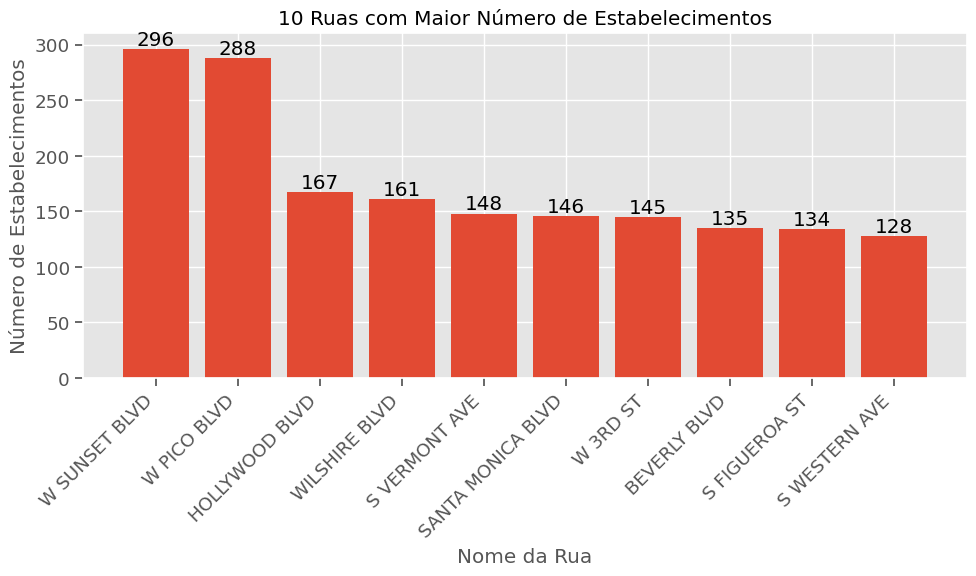

In [23]:
# Extrair nome da rua usando regex para remover o número
df['street_name'] = df['address'].str.replace(r'^\d+\s+', '', regex=True)

# Contar estabelecimentos por nome da rua
street_counts = df['street_name'].value_counts()

# Pegar as 10 ruas com mais estabelecimentos
top_10_streets = street_counts.head(10)

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_streets)), top_10_streets.values)
plt.title('10 Ruas com Maior Número de Estabelecimentos')
plt.xlabel('Nome da Rua')
plt.ylabel('Número de Estabelecimentos')

# Configurar os rótulos do eixo x
plt.xticks(range(len(top_10_streets)), top_10_streets.index, rotation=45, ha='right')

# Adicionar valores sobre as barras
for i, v in enumerate(top_10_streets.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


### 3.7 Número de ruas que têm apenas um restaurante

In [24]:
# Contar quantas ruas têm apenas um estabelecimento
ruas_com_um = (df['address'].value_counts() == 1).sum()

print(f"\nNúmero de ruas com apenas um estabelecimento: {ruas_com_um}")



Número de ruas com apenas um estabelecimento: 7596


### 3.8 Distribuição de número de assentos para ruas com muitos restaurantes 

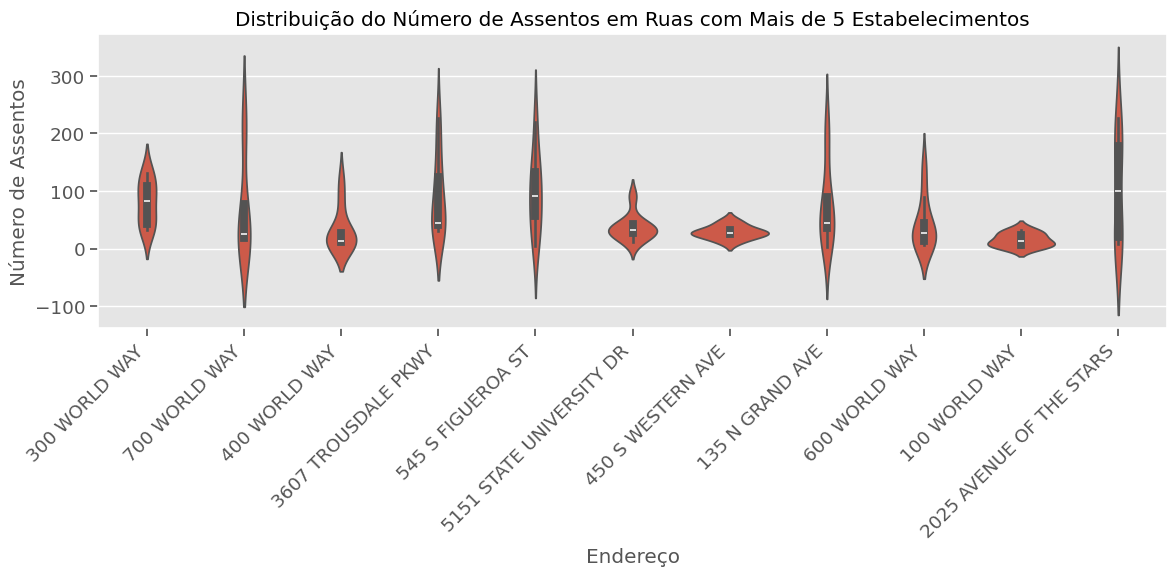

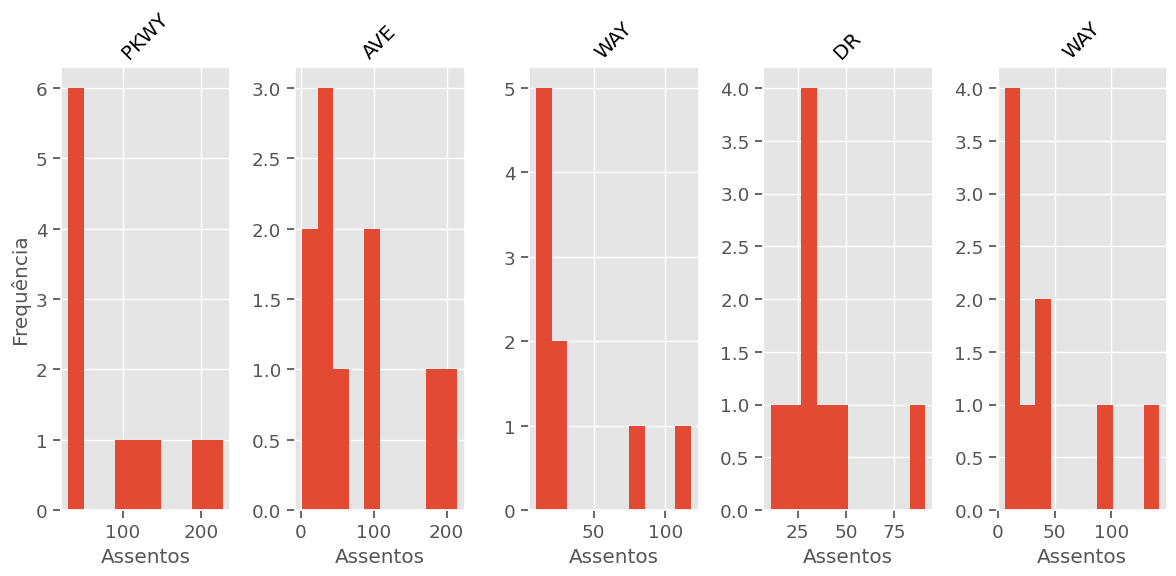


Estatísticas descritivas do número de assentos por rua:
                          count        mean        std   min    25%    50%  \
address                                                                      
3607 TROUSDALE PKWY        11.0   92.727273  69.488259  31.0  41.50   44.0   
135 N GRAND AVE            10.0   76.500000  70.635606   2.0  35.75   44.5   
400 WORLD WAY               9.0   33.555556  38.285477  10.0  11.00   14.0   
600 WORLD WAY               9.0   42.777778  45.162976   6.0  13.00   28.0   
5151 STATE UNIVERSITY DR    9.0   37.000000  22.588714  11.0  27.00   32.0   
545 S FIGUEROA ST           8.0   97.125000  68.594955   5.0  56.25   91.0   
2025 AVENUE OF THE STARS    8.0  104.375000  93.189419   8.0  20.50  100.5   
700 WORLD WAY               8.0   70.750000  88.627229  16.0  19.25   26.0   
300 WORLD WAY               8.0   80.125000  38.442675  33.0  42.50   83.0   
100 WORLD WAY               6.0   15.333333  11.775681   3.0   6.00   13.0   
450 S W

In [25]:
# Identificar ruas com mais de 5 estabelecimentos
ruas_movimentadas = df['address'].value_counts()[df['address'].value_counts() > 5].index

# Filtrar o DataFrame para incluir apenas estabelecimentos em ruas movimentadas
df_ruas_movimentadas = df[df['address'].isin(ruas_movimentadas)]

# Criar gráfico de violino para mostrar a distribuição
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_ruas_movimentadas, x='address', y='number')
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição do Número de Assentos em Ruas com Mais de 5 Estabelecimentos')
plt.xlabel('Endereço')
plt.ylabel('Número de Assentos')
plt.tight_layout()
plt.show()

# Criar histograma para cada rua movimentada
plt.figure(figsize=(12, 6))
for i, rua in enumerate(ruas_movimentadas[:5]): # Mostrar apenas top 5 para melhor visualização
    plt.subplot(1, 5, i+1)
    dados_rua = df_ruas_movimentadas[df_ruas_movimentadas['address'] == rua]['number']
    plt.hist(dados_rua, bins=10)
    plt.title(rua.split()[-1], rotation=45) # Mostrar apenas última palavra do endereço
    plt.xlabel('Assentos')
    if i == 0:
        plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Calcular estatísticas descritivas
stats_ruas = df_ruas_movimentadas.groupby('address')['number'].describe()
print("\nEstatísticas descritivas do número de assentos por rua:")
print(stats_ruas.sort_values(by='count', ascending=False))


#### Conclusões da Análise de Distribuição de Assentos por Rua

- O gráfico de violino mostra que a maioria das ruas com mais de 5 estabelecimentos tem uma distribuição assimétrica do número de assentos, com muitos estabelecimentos pequenos e alguns outliers maiores.

- Pelos histogramas das 5 ruas mais movimentadas, podemos observar que:
  - A maioria dos estabelecimentos tem entre 20-40 assentos
  - Existem alguns estabelecimentos muito grandes (>100 assentos) que puxam a média para cima
  - A distribuição é geralmente assimétrica positiva (right-skewed)

- As estatísticas descritivas confirmam essa análise, mostrando que:
  - As ruas mais movimentadas têm uma grande variação no número de assentos
  - A mediana é geralmente menor que a média, indicando a presença de outliers grandes
  - Existe uma considerável heterogeneidade entre estabelecimentos mesmo dentro da mesma rua


## 4. Conclusão Geral e Recomendações

 ### Conclusão Geral e Recomendações para Cafeteria com Garçons Robôs em LA
 
 #### Tipo de Estabelecimento
 - Cafeterias representam um nicho específico no mercado, com números mais modestos que restaurantes tradicionais
 - A inovação dos garçons robôs pode ser um diferencial importante para se destacar
 - Recomenda-se manter o foco em café e itens simples de alimentação para otimizar a operação robotizada
 
 #### Número de Assentos Recomendado
 ##### Para uma cafeteria robotizada nova, sugere-se:
 - Entre 25-35 assentos para início de operação
 - Este tamanho permite:
   - Testar o conceito sem investimento excessivo
   - Manter qualidade do atendimento robotizado
   - Gerar movimento suficiente para atrair interesse
   - Expandir se necessário após validação do modelo
 
 #### Potencial para Rede
 - O baixo percentual de redes (chains) na região indica oportunidade de mercado
 - Estratégia recomendada para expansão:
   - Começar com uma unidade piloto para validar tecnologia
   - Focar em áreas de alto tráfego de pedestres
   - Expandir gradualmente após comprovação do conceito
   - Padronizar processos para facilitar replicação
